如何数值计算几个不同分布的独立随机变量之和之pdf?不用随机模拟的话。

首先可以考虑到离散化卷积，但我们必须注意这种估计的精度很可能是有问题的。

In [7]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import scipy.stats as stats

from functools import reduce



In [2]:
expect = 2


In [5]:
norm_dis = stats.norm(loc=expect,scale=1)
norm_2_dis = stats.norm(loc=expect,scale=2)
lognorm_dis = stats.lognorm(np.sqrt(2*np.log(2)),loc = expect-2)
chi2_dis = stats.chi2(expect)
exp_dis = stats.expon(scale=expect)


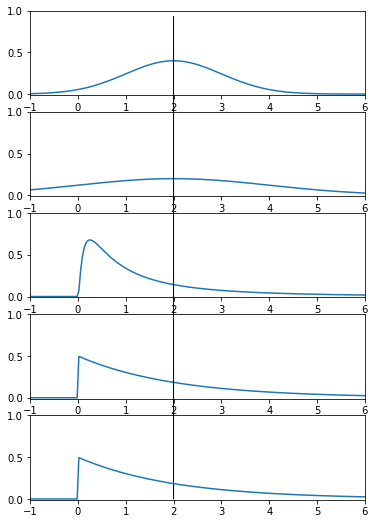

In [8]:
x = np.linspace(-1,6,200)

fig, axs = plt.subplots(5, 1, figsize=(6, 9))


axs[0].plot(x,norm_dis.pdf(x))
axs[1].plot(x,norm_2_dis.pdf(x))
axs[2].plot(x,lognorm_dis.pdf(x))
axs[3].plot(x,chi2_dis.pdf(x))
axs[4].plot(x,exp_dis.pdf(x))

xy = (1.0, 0.0)
coordsA = "data"
coordsB = "data"
con = ConnectionPatch(xyA=(expect,0.0), xyB=(expect,0.99  ), coordsA=coordsA, coordsB=coordsB,
                      axesA=axs[4], axesB=axs[0], shrinkB=5)
#ax1.add_artist(con)
axs[4].add_artist(con)

for ax in axs:
    ax.set_xlim(-1,6)
    ax.set_ylim(-0.01,1)


In [9]:
step = x[1] - x[0]

In [11]:
np.sum(norm_dis.pdf(x) * x * step)

2.0014716520409728

In [12]:
np.sum(norm_2_dis.pdf(x) * x * step)

1.9736328006107797

In [13]:
np.sum(lognorm_dis.pdf(x) * x * step)

1.2712991747888402

In [15]:
np.sum(chi2_dis.pdf(x) * x * step)

1.6043494109302727

In [16]:
np.sum(exp_dis.pdf(x) * x * step)

1.6043494109302727

可以看到对称分布的期望比较准确，而本来左偏的分布的用此法计算的期望也严重“左偏”了。再看看概率本身的情况

In [17]:
np.sum(norm_dis.pdf(x) * step)

0.99869730566499026

In [18]:
np.sum(norm_2_dis.pdf(x) * step)

0.91204864393519192

In [19]:
np.sum(lognorm_dis.pdf(x) * step)

0.93636145353306743

In [21]:
np.sum(chi2_dis.pdf(x) * step)

0.9493811089053632

In [22]:
np.sum(exp_dis.pdf(x) * step)

0.9493811089053632

In [23]:
lognorm_dis.cdf(6)

0.93596794017476448

看起来长尾分布们的尾的影响还是很难忽略，特别是考虑到它们甚至可能有一个不收敛的尾

In [30]:
lognorm_dis.cdf(15)

0.98927606198089224

In [31]:
x = np.linspace(-1,20,600)
step = x[1] - x[0]

In [32]:
np.sum(norm_dis.pdf(x) * x * step)

2.008360986247419

In [33]:
np.sum(norm_2_dis.pdf(x) * x * step)

2.1314004889842604

In [34]:
np.sum(lognorm_dis.pdf(x) * x * step)

1.8347084714696544

In [36]:
np.sum(chi2_dis.pdf(x) * x * step)

2.0057315247442413

In [35]:
np.sum(exp_dis.pdf(x) * x * step)

2.0057315247442413

In [37]:
lognorm_dis.cdf(20)

0.99452578853822493

In [38]:
x = np.linspace(-1,25,1600)
step = x[1] - x[0]

In [39]:
np.sum(lognorm_dis.pdf(x) * x * step)

1.8804646776258029

In [40]:
x = np.linspace(-1,25,3600)
step = x[1] - x[0]

In [41]:
np.sum(lognorm_dis.pdf(x) * x * step)

1.8804283600922511

In [42]:
x = np.linspace(-1,55,3600)
step = x[1] - x[0]

np.sum(lognorm_dis.pdf(x) * x * step)

1.9740008400019886

In [44]:
x = np.linspace(-1,100,500)
step = x[1] - x[0]

np.sum(lognorm_dis.pdf(x) * x * step)

1.9928954182519838

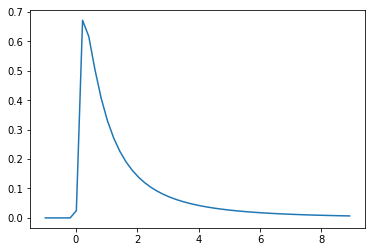

In [47]:
plt.plot(x[:50],lognorm_dis.pdf(x)[:50])

In [49]:
x = np.linspace(-1,100,1000)
step = x[1] - x[0]

np.sum(lognorm_dis.pdf(x) * x * step)

1.9936868041668405

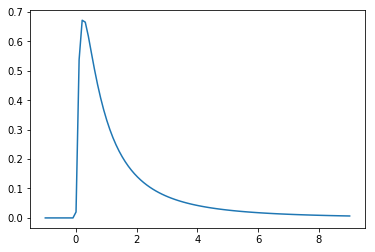

In [51]:
plt.plot(x[:100],lognorm_dis.pdf(x)[:100])

这样看起来还行，试试在这个设定下使用离散卷积

In [63]:
pdf_list = [norm_dis.pdf(x)*step,lognorm_dis.pdf(x)*step,chi2_dis.pdf(x)*step,exp_dis.pdf(x)*step]
sum_pdf = reduce(np.convolve, pdf_list)


In [66]:
x2 = np.linspace(-4,400,len(sum_pdf))

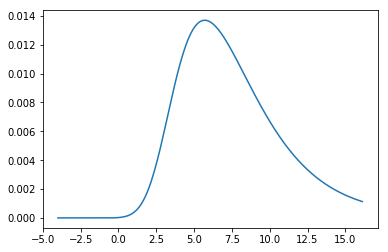

In [67]:
plt.plot(x2[:200],sum_pdf[:200])

In [68]:
np.sum(x2 * sum_pdf)

8.1986836111407033

In [69]:
np.sum(sum_pdf * x2)

8.1986836111407033